In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../Downloads"))

['.ipynb_checkpoints', 'A1902110003_Amortisation Schedule.pdf', 'aadhaar1.jpg', 'aadhaar2.jpg', 'agricultural-silos-storage-drying-grains-wheat-corn-soy-sunflower-industrial-building-exterior-big-metallic-silver-containers-close-up_102332-2623.jpg', 'Anaconda3-2020.02-Windows-x86_64.exe', 'assgn1 (1).pdf', 'assgn1.pdf', 'assgn1_572.Rmd', 'assgn_572 (1).R', 'assgn_572.R', 'Assgt 3 - mktSegmentation.pdf', 'assgt1-loan default prediction and investment- LendingClub.pdf', 'assgt2-loan default prediction and investment- LendingClub 2(2).pdf', 'Assgt3_BathSoap_Data.xls', 'Assignment 2.docx', 'Assignment2_ADBMS.pdf', 'Assignment3.docx', 'balenaEtcher-Setup-1.5.79.exe', 'CampusCareID_cviswa2.pdf', 'Chapter01(1).pptx', 'Chapter02_Kimball(1).pptx', 'Chapter03_RetailSales_Kimball.pptx', 'Chapter04_Inventory_Kimball(2).pptx', 'Chapter05_Procurement_Kimball(2).pptx', 'Chapter06_OrderManagement_Kimball.pptx', 'Chapter07_Accounting_Kimball.pptx', 'Chapter08_CRM_Kimball.pptx', 'citation-228995273.ris'

In [2]:
data = pd.read_csv('../Downloads/fifa19data.csv')
data.shape
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [3]:
# Change column name of the 1st column
data.rename(columns={'Unnamed: 0':'Sl_num'},inplace=True)

In [4]:
#Get required coulmn numbers
data.columns.get_loc("Crossing")
data.columns.get_loc("GKReflexes")

87

In [5]:
data[data['GKReflexes'].isnull()].index.tolist()

[13236,
 13237,
 13238,
 13239,
 13240,
 13241,
 13242,
 13243,
 13244,
 13245,
 13246,
 13247,
 13248,
 13249,
 13250,
 13251,
 13252,
 13253,
 13254,
 13255,
 13256,
 13257,
 13258,
 13259,
 13260,
 13261,
 13262,
 13263,
 13264,
 13265,
 13266,
 13267,
 13268,
 13269,
 13270,
 13271,
 13272,
 13273,
 13274,
 13275,
 13276,
 13277,
 13278,
 13279,
 13280,
 13281,
 13282,
 13283]

In [6]:
data.drop(data.index[[13236,13237,13238,13239,13240,13241,13242,13243,13244,13245,13246,13247,13248,13249,13250,13251,13252,
13253,13254,13255,13256,13257,13258,13259,13260,13261,13262,13263,13264,13265,13266,13267,13268,13269,13270,13271,13272,13273,
13274,13275,13276,13277,13278,13279,13280,13281,13282,13283]], inplace= True)

In [7]:
data.isnull().sum()

Sl_num               0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1516
Length: 89, dtype: int64

In [8]:
#Select all attribute columns that affect the overall rating of the player
dt1=data.iloc[:,54:88]

In [9]:
dt1.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [10]:
dt1.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [11]:
## Scale the data, using sklearn
import sklearn.preprocessing as preprocessing
dat_scaled=preprocessing.scale(dt1,axis=0)

In [12]:
print (dat_scaled)
print ("Type of output is "+str(type(dat_scaled)))
print ("Shape of the object is "+str(dat_scaled.shape))

[[ 1.86592159  2.53256708  1.01855213 ... -0.07465947 -0.14024128
  -0.48516121]
 [ 1.86592159  2.48135144  2.11179856 ... -0.07465947 -0.14024128
  -0.31807333]
 [ 1.59365003  2.12284191  0.55823785 ... -0.07465947 -0.08153585
  -0.31807333]
 ...
 [-1.34688284 -0.28429352 -0.36239071 ... -0.37764552 -0.6098847
  -0.20668142]
 [-0.3122509   0.22786295 -0.76516571 ... -0.13525668 -0.49247385
  -0.42946525]
 [-0.47561384 -0.5915874  -0.36239071 ... -0.43824273 -0.25765214
  -0.42946525]]
Type of output is <class 'numpy.ndarray'>
Shape of the object is (18159, 34)


In [13]:
## Create a cluster model
import sklearn.cluster as cluster

In [14]:
from scipy.spatial.distance import cdist

K=range(1,20)
wss = []

for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss.append(sum(np.min(cdist(dat_scaled, kmeans.cluster_centers_, 'euclidean'), 
                                      axis=1)) / dat_scaled.shape[0])

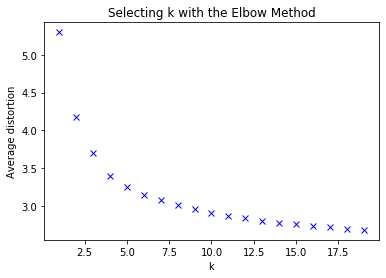

In [15]:
import matplotlib.pyplot as plt
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [16]:
import sklearn.metrics as metrics
for i in range(7,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dat_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(dat_scaled,labels,metric="euclidean",
                                 sample_size=10000,random_state=200)))

Silhoutte score for k= 7 is 0.2005519772474335
Silhoutte score for k= 8 is 0.19575030902641852
Silhoutte score for k= 9 is 0.1852824683934948
Silhoutte score for k= 10 is 0.14316534309054227
Silhoutte score for k= 11 is 0.13934017398986356
Silhoutte score for k= 12 is 0.13058935699289442


In [41]:
kmeans=cluster.KMeans(n_clusters=9,random_state=200).fit(dat_scaled)

In [42]:
#Population mean
colmeans=dt1.mean()
#Population standard deviation
std=dt1.std(axis=0)
#Group Means(sample mean)
group_mean=dt1.groupby([kmeans.labels_]).mean()

In [43]:
group_mean

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,51.615819,34.002568,50.759630,56.896764,32.640986,55.175141,40.168464,36.183359,50.429379,55.952234,...,40.816127,49.610169,55.585003,58.847971,57.702619,10.414484,10.350282,10.220853,10.277350,10.209553
1,14.257651,12.020237,14.369200,27.267029,12.399309,13.856367,14.707799,14.462981,25.806515,19.946199,...,20.005429,45.125864,15.223593,14.141658,14.071076,65.317868,62.860809,61.477789,63.044423,66.098717
2,66.251868,67.065495,53.851868,69.397802,62.938022,73.718242,67.618462,62.098901,62.292747,72.892747,...,63.597802,68.062418,38.235604,35.756044,32.461978,10.664176,10.744615,10.766154,10.530989,10.590330
3,32.738491,24.722506,62.011509,50.042839,27.499361,36.180307,29.198210,28.462916,42.688619,46.403453,...,37.134271,52.363171,61.067775,64.202685,61.578645,10.414962,10.421355,10.385550,10.393223,10.421355
4,59.975477,48.069142,54.583787,65.930177,45.076975,63.164850,54.897480,49.137262,61.804837,65.237738,...,49.561649,61.089237,59.894755,62.814373,60.659401,10.620572,10.603202,10.597071,10.642030,10.648501
5,47.579104,36.068657,68.958806,64.303881,35.889552,51.819701,41.647164,39.361194,60.713433,60.650149,...,45.086567,64.400597,68.748060,70.881791,68.351045,10.663881,10.760597,10.718806,10.817313,10.751045
6,68.312993,58.566544,61.851657,74.528669,58.564440,70.948974,67.290900,62.454498,71.162020,73.788532,...,61.001578,71.895844,66.758022,69.493425,66.356654,10.556549,10.639663,10.738559,10.754866,10.604419
7,46.400374,67.535492,66.628269,58.827522,59.443337,63.076588,50.271482,42.991905,44.718555,64.843711,...,63.316936,61.562889,29.785181,25.522416,22.529265,10.518680,10.616438,10.750311,10.650685,10.680573
8,50.089726,55.639300,45.712427,56.567070,47.133692,61.580529,49.114850,42.549125,48.449529,60.402423,...,53.901750,52.699417,31.977568,29.122028,28.371916,10.124720,10.306415,10.238672,10.202333,10.176312


In [44]:
data["Cluster"]= kmeans.labels_

In [45]:
#Function to convert skill rating at each position.
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    
    else:
        return val

In [46]:
skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
                      
for col in skill_columns:
    data[col] = data[col].apply(skillConverter)

In [47]:
def position_simplifier(val):
    
    if val == 'RF' or val == 'ST' or val == 'LF' or val == 'RS' or val == 'LS' or val == 'CF':
        val = 'F'
        return val
        
    elif val == 'LW' or val == 'RCM' or val == 'LCM' or val == 'LDM' or val == 'CAM' or val == 'CDM' or val == 'RM' \
         or val == 'LAM' or val == 'LM' or val == 'RDM' or val == 'RW' or val == 'CM' or val == 'RAM':
        val = 'M'
        return val

    
    elif val == 'RCB' or val == 'CB' or val == 'LCB' or val == 'LB' or val == 'RB' or val == 'RWB' or val == 'LWB':
        val = 'D'
        return val
    
    else:
        return val

In [48]:
data['PositionGroup'] = data['Position'].apply(position_simplifier)
data['PositionGroup'].value_counts()

M     7589
D     5866
F     2667
GK    2025
Name: PositionGroup, dtype: int64

In [49]:
table = data.groupby([data["Cluster"],data["PositionGroup"]])["PositionGroup"].count()
print(table)

Cluster  PositionGroup
0        D                1250
         F                   6
         M                 689
1        GK               2025
2        D                   4
         F                 527
         M                1744
3        D                1541
         F                   5
         M                  17
4        D                1197
         F                  23
         M                1716
5        D                1338
         F                   3
         M                 332
6        D                 524
         F                  40
         M                1337
7        D                   1
         F                1408
         M                 197
8        D                  11
         F                 655
         M                1557
Name: PositionGroup, dtype: int64


In [50]:
#M: 8,2(attacking),4(defensive),6,
#F: 7
#D: 0,3,5
#GK: 1

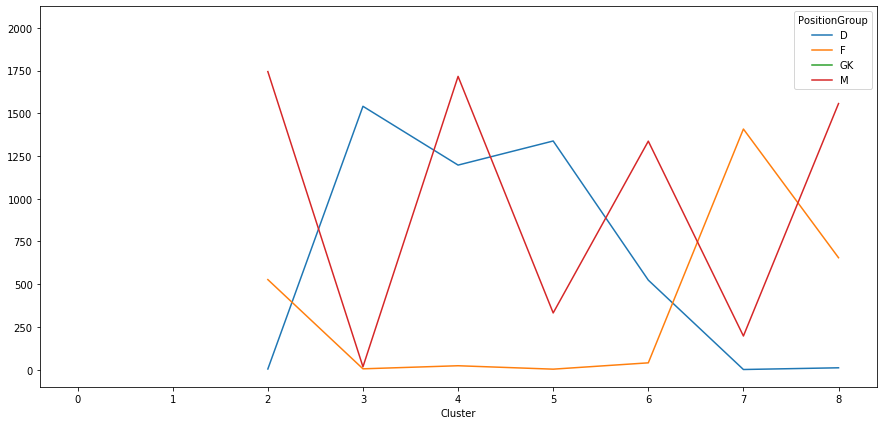

In [62]:
fig,ax = plt.subplots(figsize=(15,7))
data.groupby([data["Cluster"],data["PositionGroup"]])["PositionGroup"].count().unstack().plot(ax=ax)

In [52]:
cluster_analysis = data[["ID", "Name", "Club", "Age", "PositionGroup", "Overall", "Cluster", "Value"]]

In [53]:
cluster_analysis

,ID,Name,Club,Age,PositionGroup,Overall,Cluster,Value
0,158023,L. Messi,FC Barcelona,31,F,94,2,€110.5M
1,20801,Cristiano Ronaldo,Juventus,33,F,94,2,€77M
2,190871,Neymar Jr,Paris Saint-Germain,26,M,92,2,€118.5M
3,193080,De Gea,Manchester United,27,GK,91,1,€72M
4,192985,K. De Bruyne,Manchester City,27,M,91,6,€102M
...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,Crewe Alexandra,19,M,47,0,€60K
18203,243165,N. Christoffersson,Trelleborgs FF,19,F,47,3,€60K
18204,241638,B. Worman,Cambridge United,16,F,47,8,€60K
18205,246268,D. Walker-Rice,Tranmere Rovers,17,M,47,8,€60K


In [85]:
def currencyConverter(val):
    if val[-1] == 'M':
        val = val[1:-1]
        val = float(val) * 1000000
        return val
        
    elif val[-1] == 'K':
        val = val[1:-1]
        val = float(val) * 1000
        return val
    
    else:
        return 0

In [87]:
cluster_analysis['Value in Pounds'] = cluster_analysis['Value'].apply(currencyConverter)

,ID,Name,Club,Age,PositionGroup,Overall,Cluster,Value,Value in Pounds
0,158023,L. Messi,FC Barcelona,31,F,94,2,€110.5M,110500000.0
1,20801,Cristiano Ronaldo,Juventus,33,F,94,2,€77M,77000000.0
2,190871,Neymar Jr,Paris Saint-Germain,26,M,92,2,€118.5M,118500000.0
3,193080,De Gea,Manchester United,27,GK,91,1,€72M,72000000.0
4,192985,K. De Bruyne,Manchester City,27,M,91,6,€102M,102000000.0
...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,Crewe Alexandra,19,M,47,0,€60K,60000.0
18203,243165,N. Christoffersson,Trelleborgs FF,19,F,47,3,€60K,60000.0
18204,241638,B. Worman,Cambridge United,16,F,47,8,€60K,60000.0
18205,246268,D. Walker-Rice,Tranmere Rovers,17,M,47,8,€60K,60000.0


In [134]:
def return_similar_players(player):
    cluster_filter = cluster_analysis.loc[cluster_analysis["Name"]==player]["Cluster"].iloc[0]
    player_value = cluster_analysis.loc[cluster_analysis["Name"]==player]["Value in Pounds"].iloc[0]
    
    return cluster_filter,player_value

In [139]:
namef = "I. Perišić"
sp,pv = return_similar_players(namef)
print(sp)
print(pv)

6
37500000.0


In [140]:
def results(namef, sp, pv, return_fraction,num_results):
    return cluster_analysis[(cluster_analysis["Cluster"]==sp)&(cluster_analysis["Value in Pounds"] >= (pv * (1-return_fraction)))&(cluster_analysis["Value in Pounds"]<= (pv * (1 + return_fraction)))].head(num_results)

In [142]:
num_results=20
return_fraction = 0.1
results(namef,sp,pv,return_fraction,num_results)

,ID,Name,Club,Age,PositionGroup,Overall,Cluster,Value,Value in Pounds
49,189332,Jordi Alba,FC Barcelona,29,D,87,6,€38M,38000000.0
51,172871,J. Vertonghen,Tottenham Hotspur,31,D,87,6,€34M,34000000.0
54,152729,Piqué,FC Barcelona,31,D,87,6,€34M,34000000.0
64,191043,Alex Sandro,Juventus,27,D,86,6,€36.5M,36500000.0
69,184432,Azpilicueta,Chelsea,28,D,86,6,€35M,35000000.0
71,184087,T. Alderweireld,Tottenham Hotspur,29,D,86,6,€39M,39000000.0
82,212622,J. Kimmich,FC Bayern München,23,M,85,6,€40.5M,40500000.0
85,197445,D. Alaba,FC Bayern München,26,D,85,6,€38M,38000000.0
90,189513,Parejo,Valencia CF,29,M,85,6,€37M,37000000.0
91,187961,Paulinho,Guangzhou Evergrande Taobao FC,29,M,85,6,€37M,37000000.0
